In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_path = './data/ForecastAnalyst_CalgaryDailyEnergyDataset_2023.xlsx'

In [5]:
init_df = pd.read_excel(data_path,sheet_name='Dataset')
init_stats_df = pd.read_excel(data_path,sheet_name='Statistics')
init_corr_df = pd.read_excel(data_path, sheet_name='Correlation')


In [40]:
'''
Commonly, correlations are categorized as follows:
0.00 to 0.19: Very weak or no correlation
0.20 to 0.34: Weak correlation
0.35 to 0.59: Moderate correlation
0.60 to 0.79: Strong correlation
0.80 to 1.00: Very strong correlation
'''

high_correlated_values = init_corr_df[abs(init_corr_df.Energy) >= 0.35]
high_correlated_values

,Unnamed: 0,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,FAMILYDAY,GOODFRI,...,Sun_Hol,NightDB,MornDB,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December
0,Energy,1.000000,-0.032983,-0.284025,-0.301326,-0.399761,-0.044594,-0.013165,0.017140,-0.061678,...,-0.379268,-0.336893,-0.334273,-0.301426,-0.298100,-0.308257,0.466631,0.463390,0.209642,0.181325
4,DLSav,-0.399761,0.098293,0.066475,0.807891,1.000000,0.058761,-0.075332,-0.075332,0.038036,...,-0.011072,0.662672,0.662044,0.688302,0.704982,0.702617,-0.686054,-0.403435,0.376691,-0.403376
83,LagDep(1),0.745203,-0.033185,-0.285338,-0.300335,-0.398913,-0.041818,0.014779,-0.006151,-0.006937,...,-0.337187,-0.315263,-0.314185,-0.297127,-0.298493,-0.298829,0.483770,0.480693,0.268781,0.185197
86,YR2018_2019_WKDAY,0.394413,0.022877,0.087307,0.007904,0.007320,0.305383,-0.064566,-0.064566,0.028815,...,-0.539956,-0.011047,0.001726,-0.000089,-0.000163,-0.011834,0.007193,-0.002428,-0.019121,-0.019550
87,YR2018_2019_WKEND,-0.511889,0.020008,0.045229,0.003744,0.001440,0.148546,0.072354,0.072354,-0.031931,...,0.598686,0.013818,0.005404,-0.003589,-0.003243,0.007593,-0.007905,-0.007923,0.014672,0.007651
88,Sunday,-0.370822,0.003517,-0.000168,-0.001537,-0.000582,-0.001135,-0.000062,-0.021889,-0.021889,...,0.913497,0.006455,-0.003810,-0.005126,-0.003487,0.002531,-0.006658,-0.012134,0.001340,0.001551
89,Sun_Hol,-0.379268,0.010651,0.000796,-0.010844,-0.011072,-0.000824,0.119577,0.119577,-0.023962,...,1.000000,-0.002042,-0.014008,-0.017291,-0.015111,-0.004872,0.007770,0.011851,0.016488,0.028717
95,LagHDD1,0.466631,-0.103023,-0.099200,-0.662948,-0.686054,-0.085118,0.084927,0.085070,0.006373,...,0.007770,-0.921943,-0.898527,-0.860801,-0.851898,-0.931630,1.000000,0.781914,-0.427719,0.290232
96,LagHDD2,0.463390,-0.043630,-0.072249,-0.329515,-0.403435,-0.037723,0.086264,0.084825,-0.014995,...,0.011851,-0.665986,-0.635875,-0.589353,-0.573260,-0.650327,0.781914,1.000000,-0.167206,0.160080


In [49]:
columns = high_correlated_values['Unnamed: 0'][1:]

In [68]:
data_y = init_df[high_correlated_values['Unnamed: 0'][:]]
data_y

,Energy,DLSav,LagDep(1),YR2018_2019_WKDAY,YR2018_2019_WKEND,Sunday,Sun_Hol,LagHDD1,LagHDD2
0,1106.217621,0,NaN,0,0,1,1,16.595833,0.000000
1,1227.007587,0,1106.217621,0,0,0,1,22.108333,5.108333
2,1317.794971,0,1227.007587,0,0,0,0,29.883333,12.883333
3,1298.445827,0,1317.794971,0,0,0,0,28.591667,11.591667
4,1276.709114,0,1298.445827,0,0,0,0,21.575000,4.575000
...,...,...,...,...,...,...,...,...,...
2483,NaN,1,NaN,1,0,0,0,0.161917,0.000000
2484,NaN,1,NaN,0,1,0,0,0.324042,0.000000
2485,NaN,1,NaN,0,1,1,1,2.222208,0.000000
2486,NaN,1,NaN,1,0,0,0,2.916667,0.000000


In [69]:
data_y = data_y.dropna()

In [70]:
inputs_y = data_y[columns]
inputs_y

,DLSav,LagDep(1),YR2018_2019_WKDAY,YR2018_2019_WKEND,Sunday,Sun_Hol,LagHDD1,LagHDD2
1,0,1106.217621,0,0,0,1,22.108333,5.108333
2,0,1227.007587,0,0,0,0,29.883333,12.883333
3,0,1317.794971,0,0,0,0,28.591667,11.591667
4,0,1298.445827,0,0,0,0,21.575000,4.575000
5,0,1276.709114,0,0,0,0,17.616667,0.616667
...,...,...,...,...,...,...,...,...
2429,1,1108.968015,0,1,1,1,0.000000,0.000000
2430,1,1133.337416,1,0,0,0,0.000000,0.000000
2431,1,1307.781640,1,0,0,0,0.000000,0.000000
2432,1,1318.788780,1,0,0,0,0.000000,0.000000


In [71]:
outputs_y = data_y[high_correlated_values['Unnamed: 0'][0]]
outputs_y

1       1227.007587
2       1317.794971
3       1298.445827
4       1276.709114
5       1281.696998
           ...     
2429    1133.337416
2430    1307.781640
2431    1318.788780
2432    1232.871479
2433    1157.525152
Name: Energy, Length: 2401, dtype: float64

In [74]:
output_arr = np.array(outputs_y)
input_arr = np.array(inputs_y)
in_train, in_test, out_train, out_test = train_test_split(input_arr, output_arr, test_size=0.15)

In [83]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(in_train, out_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(in_test)

# Evaluate the best model
mse = mean_squared_error(out_test, y_pred)
mae = mean_absolute_error(out_test, y_pred)
r2 = r2_score(out_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 1832.2435247927635
Mean Absolute Error: 31.02055326802003
R-squared: 0.7920799492884514


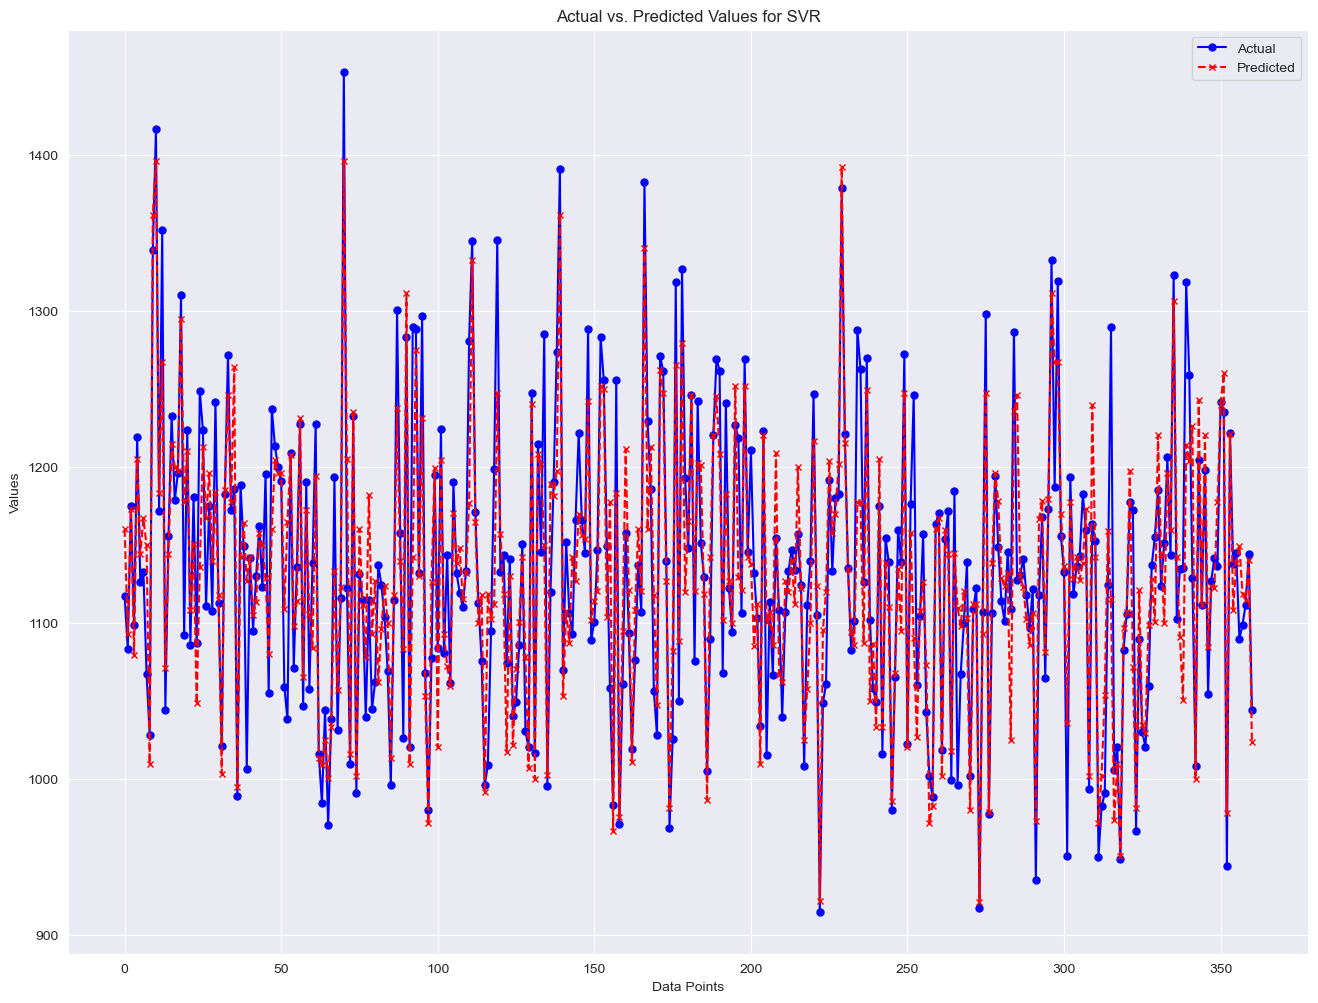

In [84]:
# Assuming y_pred and y_test are your predicted and actual values, you can create a DataFrame for the plot.
# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(out_test))  # Create an array of indices
plt.plot(x, out_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for SVR')
plt.legend()
plt.show()

Best Hyperparameters: {'C': 10.0, 'epsilon': 0.1}
Mean Squared Error: 4069.679004692883
R-squared: 0.5381793666695177


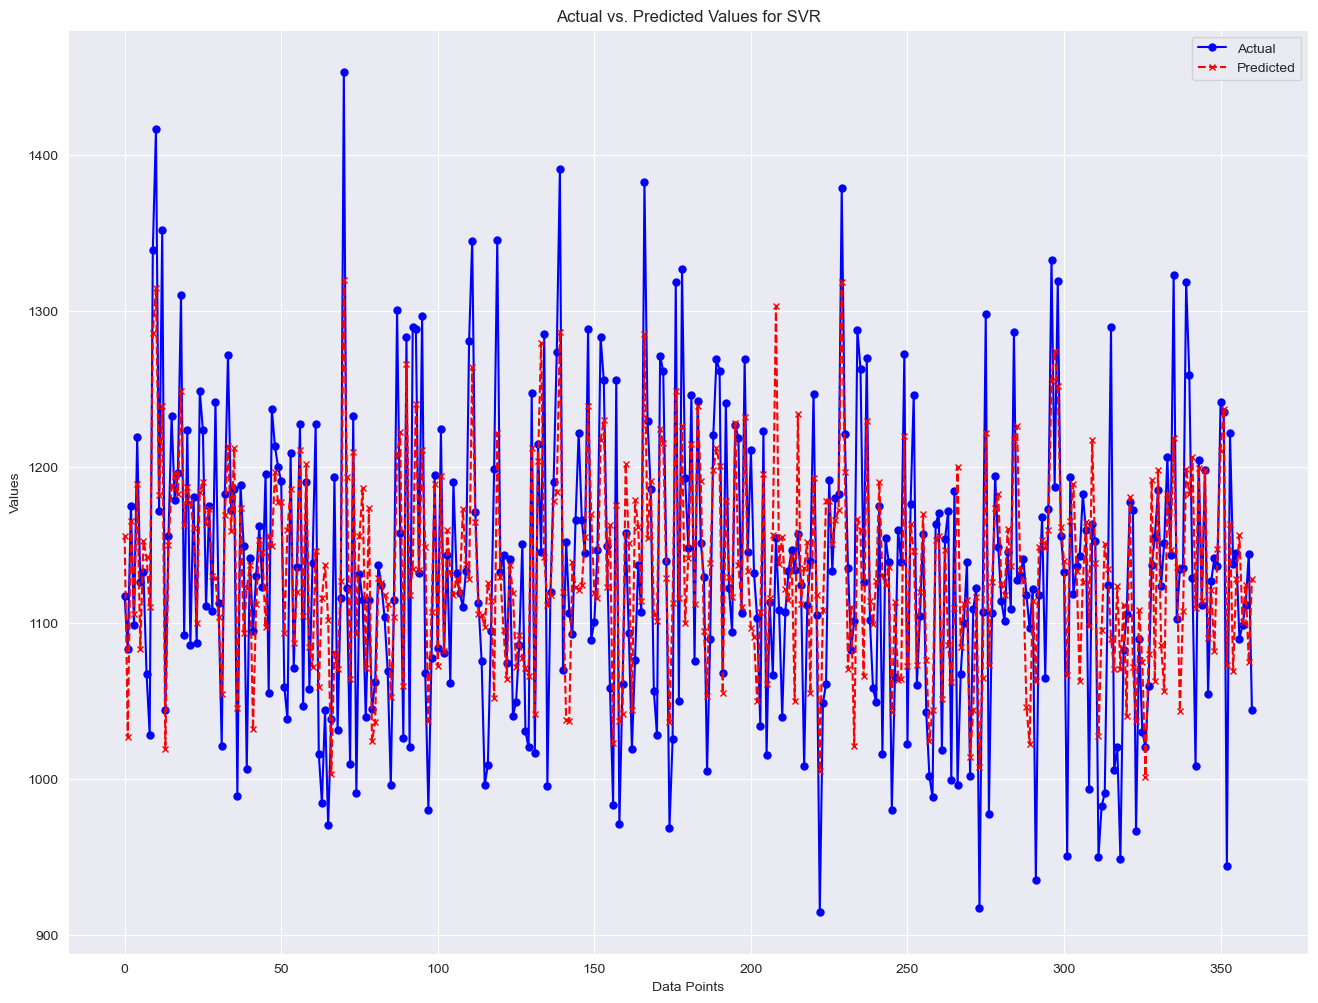

In [82]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.1, 0.2, 0.3],
}

# Create the SVR model
svr = SVR(kernel='rbf')

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(in_train, out_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_svr.predict(in_test)

# Evaluate the best model
mse = mean_squared_error(out_test, y_pred)
r2 = r2_score(out_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(out_test))  # Create an array of indices
plt.plot(x, out_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for SVR')
plt.legend()
plt.show()

In [98]:
# All data until Aug 31, 2023
init_df[:][:2434]

,Year,Month,Day,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,...,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December,Bad,XMissing,YMissing
0,2017,1,1,1106.217621,0,0.0,8.002210,0,731,0,...,-12.033333,-14.083333,-6.116667,16.595833,0.000000,0.000000,0,0,1,0
1,2017,1,2,1227.007587,0,0.0,8.022236,0,732,1,...,-17.966667,-18.699999,-14.083333,22.108333,5.108333,0.000000,0,0,0,0
2,2017,1,3,1317.794971,0,0.0,8.043889,0,733,0,...,-17.233333,-18.333333,-18.699999,29.883333,12.883333,0.000000,0,0,0,0
3,2017,1,4,1298.445827,0,0.0,8.067144,0,734,0,...,-8.700000,-13.983333,-18.333333,28.591667,11.591667,0.000000,0,0,0,0
4,2017,1,5,1276.709114,0,0.0,8.091976,0,735,0,...,-4.350000,-8.600000,-13.983333,21.575000,4.575000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2023,8,27,1133.337416,1,0.0,13.875663,1,3160,0,...,25.740833,23.889000,23.796333,0.000000,0.000000,7.509250,0,0,0,0
2430,2023,8,28,1307.781640,1,0.0,13.813835,1,3161,0,...,29.444500,24.999833,23.889000,0.000000,0.000000,7.162083,0,0,0,0
2431,2023,8,29,1318.788780,1,0.0,13.751816,1,3162,0,...,29.352000,24.999833,24.999833,0.000000,0.000000,8.365667,0,0,0,0
2432,2023,8,30,1232.871479,1,0.0,13.689615,1,3163,0,...,21.296333,20.555500,24.999833,0.000000,0.000000,8.342542,0,0,0,0


In [ ]:
summer_df = init_df[(init_df.June==1) | (init_df.July == 1) | (init_df.August == 1)]
summer_df

In [104]:
summer_df

,Year,Month,Day,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,...,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December,Bad,XMissing,YMissing
151,2017,6,1,1219.694614,0,0.0,16.254202,1,882,0,...,20.950000,20.100000,22.683333,0.0,0.0,7.191667,0,0,0,0
152,2017,6,2,1172.821785,0,0.0,16.283814,1,883,0,...,20.483334,18.800000,20.100000,0.0,0.0,5.554167,0,0,0,0
153,2017,6,3,1046.901204,0,0.0,16.312062,1,884,0,...,24.166667,22.400000,18.800000,0.0,0.0,4.670833,0,0,0,0
154,2017,6,4,1029.656914,0,0.0,16.338921,1,885,0,...,19.616667,17.783334,22.400000,0.0,0.0,4.662500,0,0,0,0
155,2017,6,5,1141.241540,0,0.0,16.364364,1,886,0,...,16.850000,15.833334,17.783334,0.0,0.0,3.341667,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2023,8,27,1133.337416,1,0.0,13.875663,1,3160,0,...,25.740833,23.889000,23.796333,0.0,0.0,7.509250,0,0,0,0
2430,2023,8,28,1307.781640,1,0.0,13.813835,1,3161,0,...,29.444500,24.999833,23.889000,0.0,0.0,7.162083,0,0,0,0
2431,2023,8,29,1318.788780,1,0.0,13.751816,1,3162,0,...,29.352000,24.999833,24.999833,0.0,0.0,8.365667,0,0,0,0
2432,2023,8,30,1232.871479,1,0.0,13.689615,1,3163,0,...,21.296333,20.555500,24.999833,0.0,0.0,8.342542,0,0,0,0


In [108]:
summer_corr = summer_df.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(summer_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()